In [1]:
from datetime import datetime, date
from nowtrade.symbol_list import StockList
from nowtrade.data_connection import YahooConnection
from nowtrade import dataset 
from nowtrade import technical_indicator
from nowtrade import criteria
from nowtrade import criteria_group
from nowtrade import trading_profile
from nowtrade import trading_amount
from nowtrade import trading_fee
from nowtrade import strategy
from nowtrade import ensemble
from nowtrade.action import Long
from nowtrade.action import Short
from nowtrade.action import LongExit
from nowtrade.action import ShortExit

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
sl=StockList(['BHARTIARTL.NS'])
symbol= sl.get('BHARTIARTL.NS')
today= date.today()
train_start = datetime.fromisoformat(today.replace(today.year-10).isoformat())
train_end = datetime.fromisoformat(today.replace(day=1,month=11,year=2020).isoformat())
train_dataset = dataset.Dataset(sl, YahooConnection(), train_start, train_end)
#train_dataset=dc.get_data(symbol,train_start,train_end)

In [4]:
train_dataset.load_data()

In [5]:
train_dataset.data_frame.columns

Index(['BHARTIARTL.NS_High', 'BHARTIARTL.NS_Low', 'BHARTIARTL.NS_Open',
       'BHARTIARTL.NS_Close', 'BHARTIARTL.NS_Volume',
       'BHARTIARTL.NS_Adj Close'],
      dtype='object')

In [6]:
train_dataset.data_frame.tail()

,BHARTIARTL.NS_High,BHARTIARTL.NS_Low,BHARTIARTL.NS_Open,BHARTIARTL.NS_Close,BHARTIARTL.NS_Volume,BHARTIARTL.NS_Adj Close
Date,,,,,,
2020-10-26,439.450012,428.0,434.350006,434.049988,11736641.0,434.049988
2020-10-27,438.899994,427.5,434.049988,433.350006,12781163.0,433.350006
2020-10-28,488.000000,442.0,446.000000,451.850006,123585414.0,451.850006
2020-10-29,457.100006,445.0,447.700012,450.799988,25066713.0,450.799988
2020-10-30,454.899994,430.5,454.899994,433.750000,23051143.0,433.750000


In [7]:
train_columns = [symbol.open, symbol.high, symbol.low, symbol.volume]
rf = ensemble.Ensemble(train_columns, [symbol.close])

In [8]:
rf.build_ensemble(train_dataset, prediction_window=5, look_back_window=25, number_of_jobs=2)

In [9]:
rf.fit()

In [10]:
#train_dataset.data_frame.head()

In [11]:
rf.save_to_file('test.ens')

In [12]:
rf= ensemble.load_from_file('test.ens')

In [13]:
test_start = train_end
test_end = datetime.fromisoformat(today.isoformat())
test_dataset = dataset.Dataset(sl, YahooConnection(), test_start, test_end)

In [14]:
test_dataset.load_data()

In [15]:
test_dataset.data_frame.shape

(69, 6)

In [16]:
random_forest = technical_indicator.Ensemble(rf)

In [17]:
# assert rf.ensemble != None, 'Please ensure you have fit your ensemble'
# if rf.normalize:
#     dataframe = np.log(test_dataset.data_frame[rf.train_data])
# else:
#     dataframe = test_dataset.data_frame[rf.train_data]
# from itertools import chain
# print(range(rf.look_back_window, len(dataframe)))
# res = []

In [18]:
# for i in range(rf.look_back_window, len(dataframe)):
#     values = dataframe[i-rf.look_back_window:i+1]
#     values = list(chain.from_iterable(values.values))
#     res.append(rf._activate(np.array(values).reshape(1,-1)))
# if rf.normalize:
#     out=np.exp(res)
# else:
#     out=res


In [19]:
# for i in range(rf.look_back_window, len(dataframe)):
#     print(i)

In [20]:
#index = train_dataset.data_frame.index[-len(out):]

In [21]:
#print(index)

In [22]:
#pd.Series(out, index=index)


In [23]:
test_dataset.add_technical_indicator(random_forest)

In [24]:
z=pd.DataFrame()

In [25]:
z=test_dataset.data_frame[25:]

In [26]:
zz=pd.DataFrame()

In [27]:
z.head()

,BHARTIARTL.NS_High,BHARTIARTL.NS_Low,BHARTIARTL.NS_Open,BHARTIARTL.NS_Close,BHARTIARTL.NS_Volume,BHARTIARTL.NS_Adj Close,ENSEMBLE_e787dae3-a873-4713-8c82-a10993653a54
Date,,,,,,,
2020-12-09,506.899994,499.100006,504.899994,503.049988,11608846.0,503.049988,504.378359
2020-12-10,508.750000,494.100006,501.500000,505.149994,13194186.0,505.149994,503.929339
2020-12-11,508.500000,497.299988,508.500000,504.399994,13760737.0,504.399994,511.127564
2020-12-14,512.000000,501.149994,507.000000,503.049988,13886923.0,503.049988,510.285454
2020-12-15,506.799988,498.100006,505.850006,504.200012,13074733.0,504.200012,513.688709


In [28]:
r_f='ENSEMBLE_'+random_forest.name

In [29]:
zz=z.loc[:,[symbol.close,r_f]]

In [30]:
zz.head()

,BHARTIARTL.NS_Close,ENSEMBLE_e787dae3-a873-4713-8c82-a10993653a54
Date,,
2020-12-09,503.049988,504.378359
2020-12-10,505.149994,503.929339
2020-12-11,504.399994,511.127564
2020-12-14,503.049988,510.285454
2020-12-15,504.200012,513.688709


In [31]:
zz.columns=[symbol.close,'rf']

In [32]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [33]:
mms=MinMaxScaler()

In [34]:
zz.head()

,BHARTIARTL.NS_Close,rf
Date,,
2020-12-09,503.049988,504.378359
2020-12-10,505.149994,503.929339
2020-12-11,504.399994,511.127564
2020-12-14,503.049988,510.285454
2020-12-15,504.200012,513.688709


In [35]:
zy=pd.DataFrame(mms.fit_transform(zz))

In [36]:
zy.columns=zz.columns

In [37]:
zy=zy.set_index(zz.index)

In [38]:
zy.head()

,BHARTIARTL.NS_Close,rf
Date,,
2020-12-09,0.103010,0.155266
2020-12-10,0.120814,0.149371
2020-12-11,0.114455,0.243881
2020-12-14,0.103010,0.232824
2020-12-15,0.112760,0.277507


<AxesSubplot:xlabel='Date'>

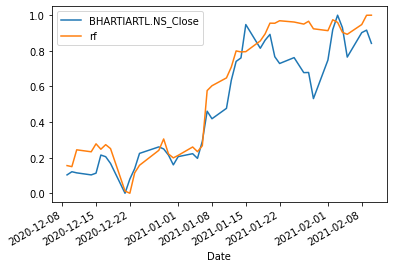

In [39]:
zy.plot()

In [40]:
threshold_above = technical_indicator.Addition(random_forest.value, 5)

In [41]:
threshold_below = technical_indicator.Subtraction(random_forest.value, 5)

In [42]:
test_dataset.add_technical_indicator(threshold_below)

In [43]:
test_dataset.add_technical_indicator(threshold_above)

In [44]:
#test_dataset.data_frame.tail()
#test_dataset.data_frame.head()

In [45]:
enter_crit_long = criteria.Below(symbol.close, threshold_below.value)

In [46]:
enter_crit_short = criteria.Above(symbol.close, threshold_above.value)

In [47]:
exit_crit_long = criteria.BarsSinceLong(symbol, 5)
exit_crit_short = criteria.BarsSinceShort(symbol, 5)

In [48]:
enter_crit_group1 = criteria_group.CriteriaGroup([enter_crit_long], Long(), symbol)
enter_crit_group2 = criteria_group.CriteriaGroup([enter_crit_short], Short(), symbol)
exit_crit_group1 = criteria_group.CriteriaGroup([exit_crit_long], LongExit(), symbol)
exit_crit_group2 = criteria_group.CriteriaGroup([exit_crit_short], ShortExit(), symbol)

In [49]:
tp = trading_profile.TradingProfile(100000, trading_amount.StaticAmount(10000), trading_fee.StaticFee(5))

In [50]:
strat = strategy.Strategy(test_dataset, [enter_crit_group1, enter_crit_group2, exit_crit_group1, exit_crit_group2], tp)

In [51]:
strat.simulate()

In [52]:
print(strat.report.pretty_overview())

Trades:
BHARTIARTL.NS
Trade(datetime=2020-12-14 00:00:00, action=LONG, symbol=BHARTIARTL.NS, price=507.0, shares=20, money=10140.0, fee=5, slippage=0.0)
Trade(datetime=2020-12-22 00:00:00, action=LONG_EXIT, symbol=BHARTIARTL.NS, price=494.0, shares=20, money=9880.0, fee=5, slippage=0.0)
Trade(datetime=2020-12-23 00:00:00, action=SHORT, symbol=BHARTIARTL.NS, price=500.29998779296875, shares=20, money=10005.999755859375, fee=5, slippage=0.0)
Trade(datetime=2021-01-01 00:00:00, action=SHORT_EXIT, symbol=BHARTIARTL.NS, price=512.25, shares=20, money=10245.0, fee=5, slippage=0.0)
Trade(datetime=2021-01-04 00:00:00, action=SHORT, symbol=BHARTIARTL.NS, price=517.0, shares=19, money=9823.0, fee=5, slippage=0.0)
Trade(datetime=2021-01-12 00:00:00, action=SHORT_EXIT, symbol=BHARTIARTL.NS, price=549.0, shares=19, money=10431.0, fee=5, slippage=0.0)
Trade(datetime=2021-01-13 00:00:00, action=SHORT, symbol=BHARTIARTL.NS, price=588.0, shares=17, money=9996.0, fee=5, slippage=0.0)
Trade(datetime=2021